### 학습목표
- pandas를 이용한 데이터시각화, seaborn을 이용한 데이터시각화를 이해하고 실습해보자

### 자주 사용하는 데이터시각화 라이브러리
1. matplotlib : 원하는 시각화로 커스터마이징에 용이, 하지만 많은 속성들을 이해해야 함
2. pandas : 내부적으로는 matplotlib을 이용해서 시각화가 동작. 사용방법이 비교적 쉽고, 데이터 전처리 후 시각화까지 한 번에 수행 가능
3. seaborn : 내부적으로는 matplotlib을 이용해서 시각화가 동작. pandas 시각화에 비해서 다양한 그래프를 지원함

### pandas 시각화 참고
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
- https://matplotlib.org/stable/users/explain/colors/colormaps.html

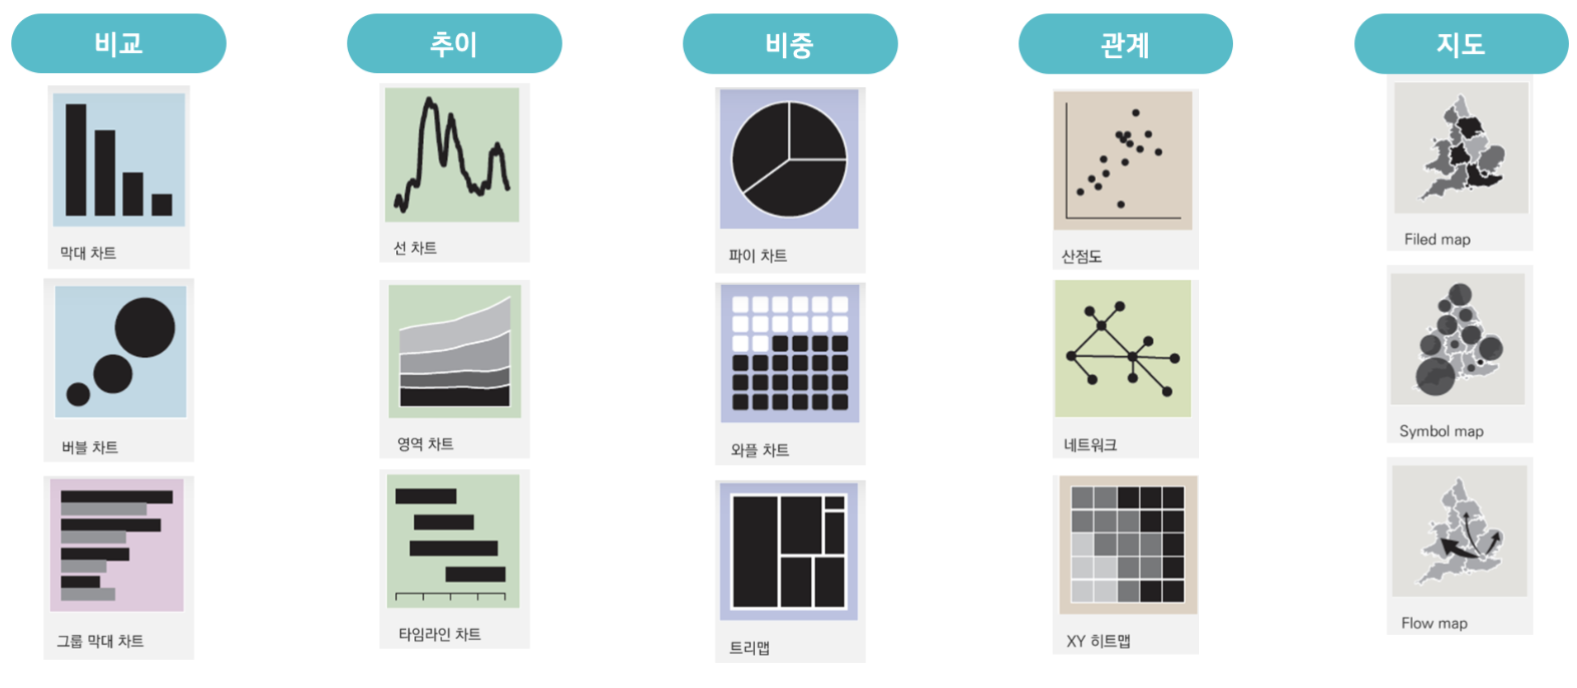

In [5]:
import pandas as pd
import os

In [6]:
os.chdir('./data')

## 1. Line chart
- 연도별 입사자 추세 확인하기

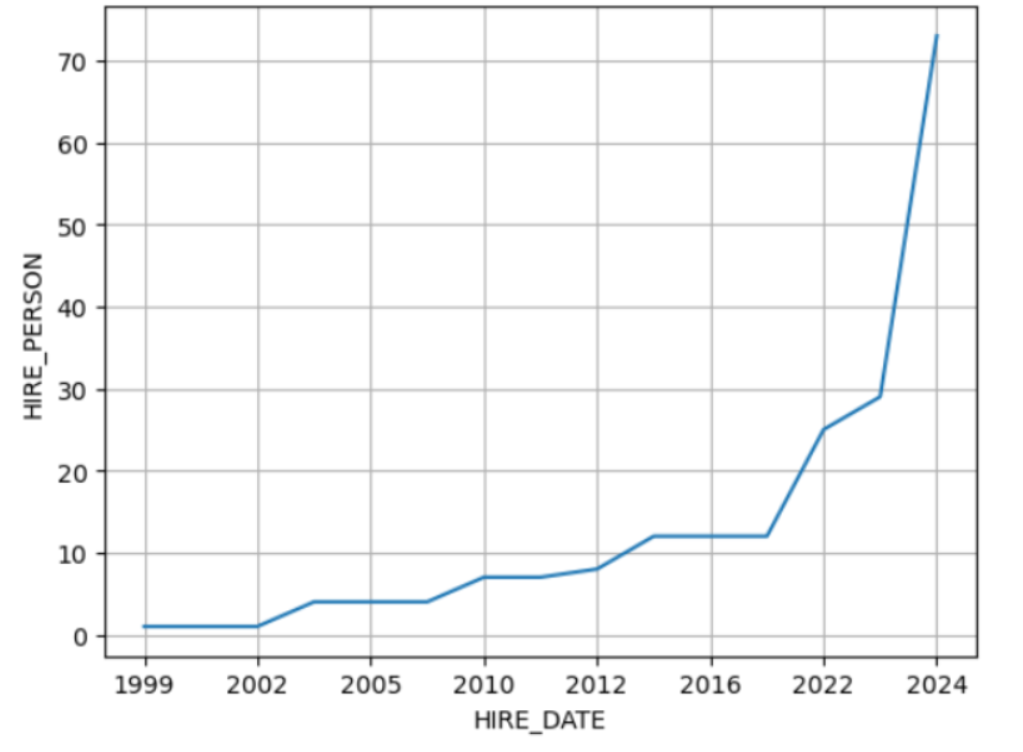

In [9]:
# parse_dates -> 날짜 포멧의 데이터를 datetime타입으로 바꿔줌
hr_info = pd.read_csv('./hr-info.csv', encoding='euc-kr', parse_dates=['HIRE_DATE'])   
hr_info.head(3)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


In [10]:
hr_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   EID                 200 non-null    object        
 1   ENAME               200 non-null    object        
 2   GENDER              200 non-null    object        
 3   ORG_CD              197 non-null    object        
 4   POS_CD              200 non-null    object        
 5   AGE                 200 non-null    int64         
 6   SERVICE_YEAR        200 non-null    int64         
 7   EDU_LEVEL           200 non-null    object        
 8   PERFORMANCE_SCORE   200 non-null    float64       
 9   SALARY              200 non-null    int64         
 10  LAST_PROMO_DT       182 non-null    object        
 11  TRAINING_HOURS      200 non-null    int64         
 12  SKILLS              200 non-null    object        
 13  ACTIVE_STATE        200 non-null    object        

In [11]:
# 입사연도 추출하기
hr_info['HIRE_DATE'].dt.year

0      1999
1      2000
2      2002
3      2006
4      2005
       ... 
195    2024
196    2024
197    2024
198    2024
199    2024
Name: HIRE_DATE, Length: 200, dtype: int32

In [12]:
# 새로운 컬럼으로 연도 데이터 추가
hr_info['HIRE_YEAR'] = hr_info['HIRE_DATE'].dt.year
hr_info.head(3)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002


In [13]:
hr_info['HIRE_YEAR'].value_counts().sort_index()

HIRE_YEAR
1999     1
2000     1
2002     1
2004     4
2005     4
2006     4
2010     7
2011     7
2012     8
2015    12
2016    12
2017    12
2022    25
2023    29
2024    73
Name: count, dtype: int64

<Axes: xlabel='HIRE_YEARE', ylabel='HIRE_COUNT'>

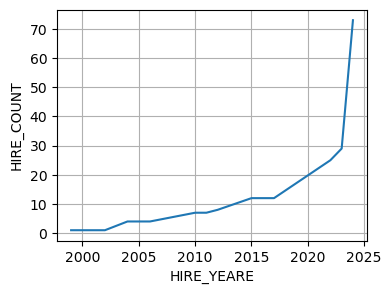

In [14]:
# 연도별로 입사자 수 세기 후 시각화
hr_info['HIRE_YEAR'].value_counts().sort_index().plot(kind='line', xlabel='HIRE_YEARE', ylabel='HIRE_COUNT', 
                                                      grid=True, figsize=(4,3))

<Axes: xlabel='HIRE_YEARE', ylabel='HIRE_COUNT'>

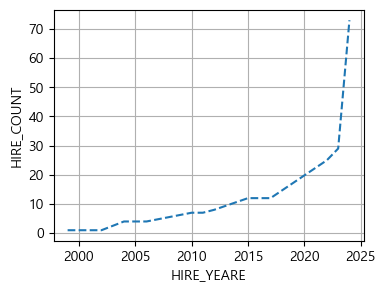

In [90]:
hr_info['HIRE_YEAR'].value_counts().sort_index().plot(kind='line', xlabel='HIRE_YEARE', ylabel='HIRE_COUNT', ls='--',
                                                      grid=True, figsize=(4,3))

## 2. Bar chart
- 학위별 평균연봉 비교해보기

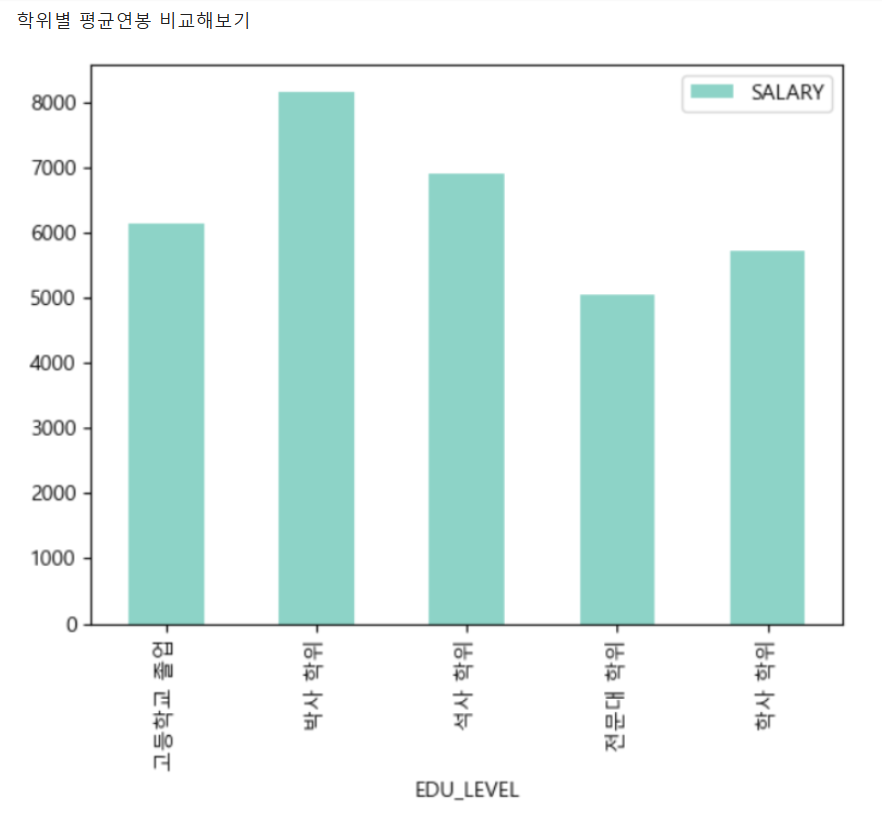

In [17]:
hr_info[['EDU_LEVEL','SALARY']].groupby(by='EDU_LEVEL').mean()

,SALARY
EDU_LEVEL,
고등학교 졸업,6140.000000
박사 학위,8166.666667
석사 학위,6900.000000
전문대 학위,5050.000000
학사 학위,5727.044025


In [18]:
# 한글폰트 적용하기
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='EDU_LEVEL'>

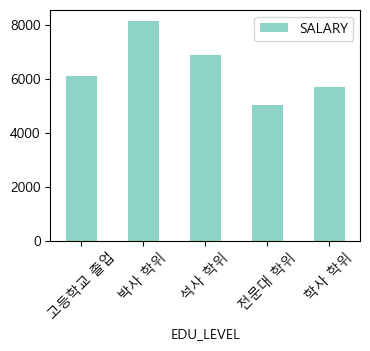

In [19]:
hr_info[['EDU_LEVEL','SALARY']].groupby(by='EDU_LEVEL').mean().plot(kind='bar', colormap='Set3', rot=45, figsize=(4,3))

#### 학위, 성별을 고려한 평균연봉 시각화

<Axes: xlabel='EDU_LEVEL,GENDER'>

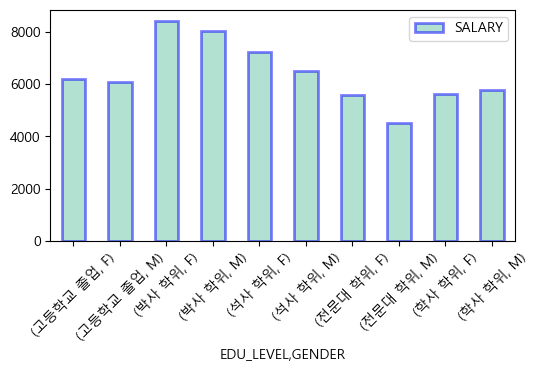

In [84]:
hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by=['EDU_LEVEL','GENDER']).mean().plot(kind='bar', colormap='Set2', rot=45,
                                                                                        linewidth=2, edgecolor='blue',alpha=0.5,figsize=(6,3))

In [ ]:
hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by=['EDU_LEVEL','GENDER']).mean().plot(kind='bar', colormap='Set2', rot=45, figsize=(6,3))

In [22]:
hr_mean = hr_info[['EDU_LEVEL','GENDER','SALARY']].groupby(by=['EDU_LEVEL','GENDER']).mean()
hr_mean

SALARY
EDU_LEVEL GENDER             
고등학교 졸업   F       6200.000000
          M       6100.000000
박사 학위     F       8425.000000
          M       8037.500000
석사 학위     F       7233.333333
          M       6525.000000
전문대 학위    F       5600.000000
          M       4500.000000
학사 학위     F       5643.076923
          M       5785.106383

In [23]:
hr_mean.reset_index(inplace=True)

In [24]:
# 데이터프레임.pivot(index=기준컬럼, columns=컬럼이될컬럼, values=값이될컬럼)
hr_mean.pivot(index='EDU_LEVEL', columns='GENDER', values='SALARY')

GENDER,F,M
EDU_LEVEL,,
고등학교 졸업,6200.000000,6100.000000
박사 학위,8425.000000,8037.500000
석사 학위,7233.333333,6525.000000
전문대 학위,5600.000000,4500.000000
학사 학위,5643.076923,5785.106383


<Axes: title={'center': '교육수준과 성별에 따른 평균연봉 비교'}, xlabel='평균연봉', ylabel='교육수준'>

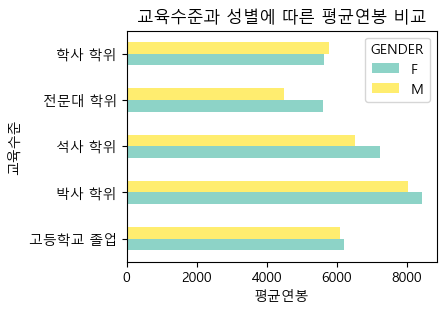

In [25]:
hr_mean.pivot(index='EDU_LEVEL', columns='GENDER', values='SALARY').plot(kind='barh', colormap='Set3', xlabel='평균연봉', ylabel='교육수준', 
                                                                         title='교육수준과 성별에 따른 평균연봉 비교', figsize=(4,3))

array([<Axes: title={'center': 'F'}, xlabel='평균연봉', ylabel='교육수준'>,
       <Axes: title={'center': 'M'}, xlabel='평균연봉', ylabel='교육수준'>],
      dtype=object)

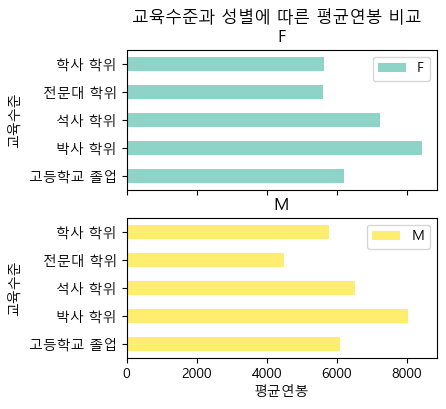

In [26]:
# subplots=True 기능
hr_mean.pivot(index='EDU_LEVEL', columns='GENDER', values='SALARY').plot(kind='barh', colormap='Set3', xlabel='평균연봉', ylabel='교육수준', 
                                                                         subplots=True, title='교육수준과 성별에 따른 평균연봉 비교', figsize=(4,4))

### [실습] 부서별 평균 연봉 비교하기
- figsize : 그림의 크기를 조절하는 속성
- ylim : y축의 limit 설정

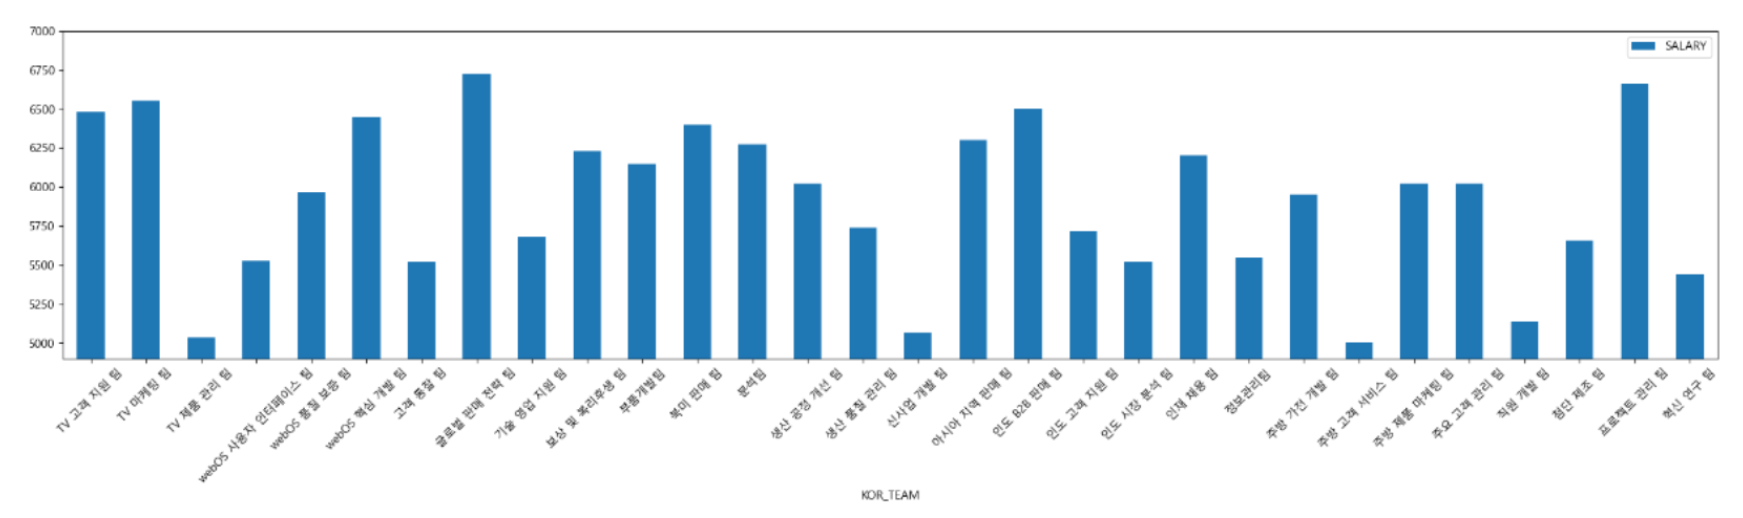

In [29]:
org_info = pd.read_csv('./org-info.csv', encoding='euc-kr')
org_info.head(2)

,ORG_CD,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,ORG001,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Product Management Team,TV 제품 관리 팀,관리 및 마케팅 전략 수립을 통해 TV 제품의 전체 라이프사이클을 관리합니다.
1,ORG002,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Marketing Team,TV 마케팅 팀,"TV 제품의 시장 진입 전략을 수립하고, 광고 및 프로모션 활동을 기획합니다."


In [30]:
hr_org = pd.merge(hr_info, org_info, how='left', on='ORG_CD')
hr_org.tail(2)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,NATION,ROUNDING_DEDUCTION,HIRE_YEAR,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.0,4500,...,KOREA,N,2024,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을..."
199,E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,...,KOREA,N,2024,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.


In [31]:
hr_org[['KOR_TEAM','SALARY']]

,KOR_TEAM,SALARY
0,NaN,10200
1,NaN,9500
2,NaN,9100
3,글로벌 판매 전략 팀,8500
4,첨단 제조 팀,8600
...,...,...
195,주방 제품 마케팅 팀,4500
196,기술 영업 지원 팀,4500
197,생산 품질 관리 팀,4500
198,고객 통찰 팀,4500


In [32]:
hr_org_gp = hr_org[['KOR_TEAM','SALARY']].dropna().groupby(by='KOR_TEAM').mean()
hr_org_gp

,SALARY
KOR_TEAM,
TV 고객 지원 팀,6480.000000
TV 마케팅 팀,6550.000000
TV 제품 관리 팀,5033.333333
webOS 사용자 인터페이스 팀,5525.000000
webOS 품질 보증 팀,5966.666667
webOS 핵심 개발 팀,6445.454545
고객 통찰 팀,5520.000000
글로벌 판매 전략 팀,6728.571429
기술 영업 지원 팀,5680.000000


<Axes: xlabel='KOR_TEAM'>

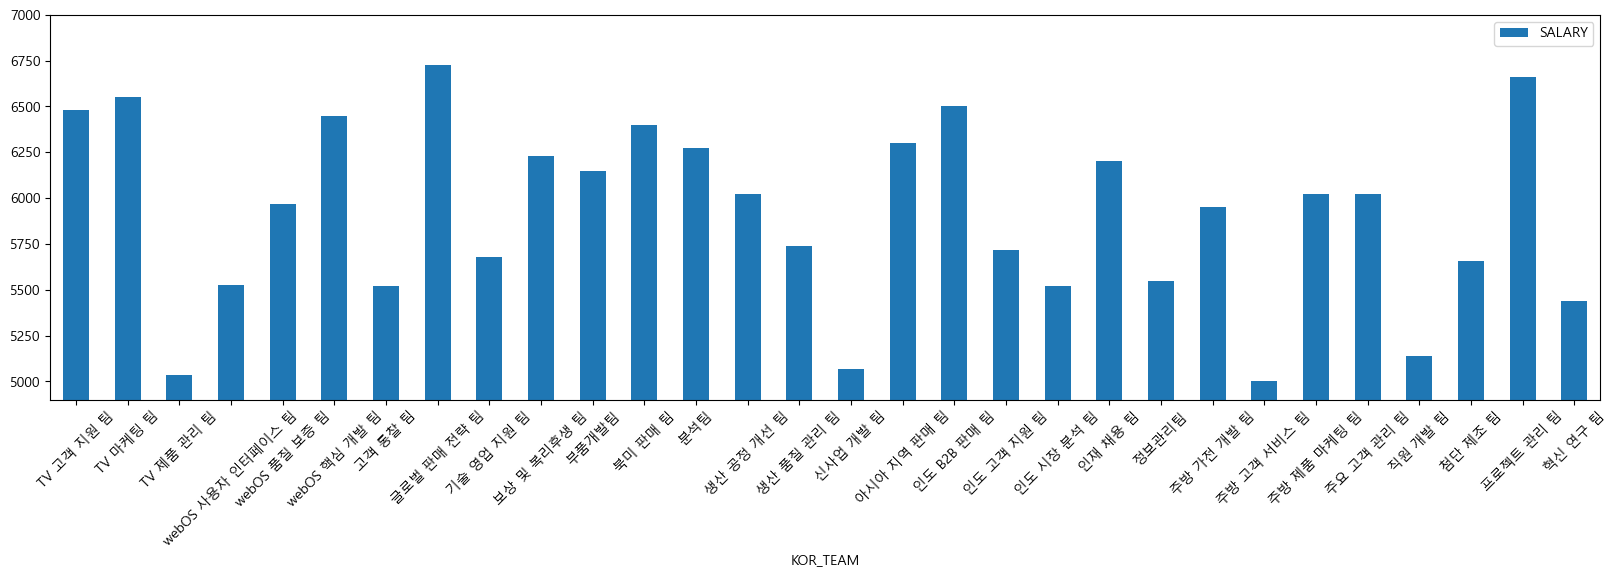

In [33]:
hr_org_gp.plot(kind='bar',ylim=(4900,7000),rot=45,figsize=(20,5))

## 3. Pie chart
- 각 부서별 인원 수(비중) 확인

In [35]:
hr_org.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,NATION,ROUNDING_DEDUCTION,HIRE_YEAR,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,KOREA,Y,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,KOREA,Y,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,KOREA,Y,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,KOREA,Y,2006,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Global Sales Strategy Team,글로벌 판매 전략 팀,"글로벌 판매 전략을 수립하고, 주요 시장에서의 판매 목표를 설정합니다."
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,KOREA,Y,2005,Production Engineering Research Institute,생산기술원,Production Technology Development Team,생산기술개발팀,Advanced Manufacturing Team,첨단 제조 팀,첨단 제조 기술 개발 및 생산성 향상 작업을 수행합니다.


In [36]:
hr_org['KOR_DIVISION'].value_counts()

KOR_DIVISION
HE사업본부    58
BS사업본부    49
VS사업본부    30
생산기술원     21
HR        20
HA사업본부    19
Name: count, dtype: int64

<Axes: title={'center': '각 본부의 인원비율'}>

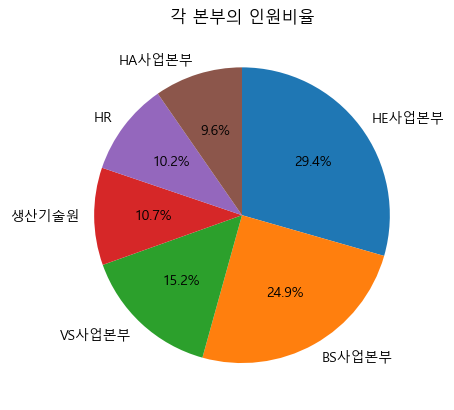

In [37]:
hr_org['KOR_DIVISION'].value_counts().plot(kind='pie', startangle=90, counterclock=False, title='각 본부의 인원비율', autopct='%.1f%%', ylabel='')

## 4. Scatter plot(산점도)

### 나이에 따른 연봉의 변화 산점도

In [41]:
hr_info.head()

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,HIRE_YEAR
0,E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,...,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,1999
1,E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,...,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,2000
2,E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,...,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,2002
3,E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,...,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,2006
4,E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,...,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,2005


<Axes: xlabel='AGE', ylabel='SALARY'>

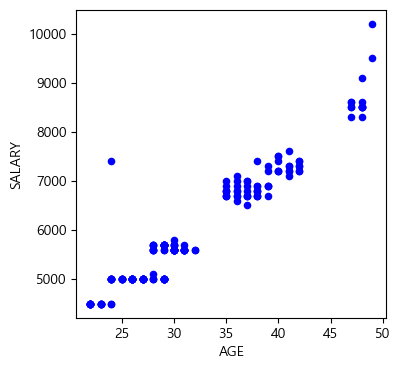

In [45]:
hr_info.plot(kind='scatter', x='AGE',y='SALARY', color='blue', figsize=(4,4))

### 팀별 성과평가점수와 연봉의 관계

In [52]:
hr_org.tail(2)

,EID,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,...,NATION,ROUNDING_DEDUCTION,HIRE_YEAR,ENG_DIVISION,KOR_DIVISION,ENG_DEPARTMENT,KOR_DEPARTMENT,Team,KOR_TEAM,Role
198,E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.0,4500,...,KOREA,N,2024,Vehicle Solutions Division,VS사업본부,Global Customer Strategy Department,글로벌고객전략담당,Customer Insights Team,고객 통찰 팀,"고객 데이터를 분석하여 인사이트를 도출하고, 이를 기반으로 제품 및 서비스 개선안을..."
199,E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,...,KOREA,N,2024,Home Entertainment Division,HE사업본부,TV Business Operations Department,TV사업운영센터,TV Customer Support Team,TV 고객 지원 팀,TV 고객 지원 서비스 제공 및 고객 만족도를 높이기 위한 해결책을 제공합니다.


In [58]:
hr_org[['KOR_TEAM', 'PERFORMANCE_SCORE', 'SALARY']].groupby(by='KOR_TEAM').mean()

,PERFORMANCE_SCORE,SALARY
KOR_TEAM,,
TV 고객 지원 팀,2.500000,6480.000000
TV 마케팅 팀,1.742500,6550.000000
TV 제품 관리 팀,0.655000,5033.333333
webOS 사용자 인터페이스 팀,1.076250,5525.000000
webOS 품질 보증 팀,1.708333,5966.666667
webOS 핵심 개발 팀,2.872727,6445.454545
고객 통찰 팀,1.870000,5520.000000
글로벌 판매 전략 팀,2.817143,6728.571429
기술 영업 지원 팀,3.036000,5680.000000


<Axes: xlabel='PERFORMANCE_SCORE', ylabel='SALARY'>

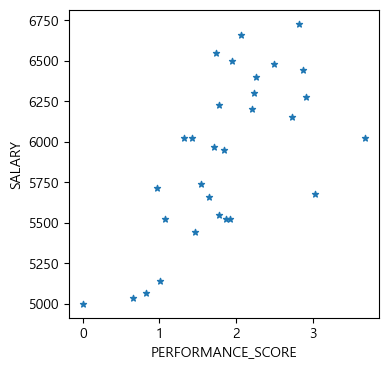

In [82]:
hr_info[['ORG_CD', 'PERFORMANCE_SCORE', 'SALARY']].groupby(by='ORG_CD').mean().plot(kind='scatter', x='PERFORMANCE_SCORE',y='SALARY', 
                                                                                    marker='*',figsize=(4,4))

#### 참고 : 그래프 속성 바꾸기
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

### Seaborn 패키지 활용 데이터 시각화
- 화려하고 다양한 형태의 그래프를 손쉽게 활용 가능
- matplotlib를 기반으로해서 일부 커스터마이징이 가능
- https://seaborn.pydata.org/examples/index.html

## 1. 히스토그램
- 성별에 따른 연봉 히스토그램

In [137]:
import seaborn as sns

<Axes: xlabel='SALARY', ylabel='Count'>

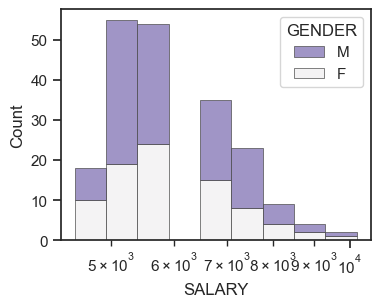

In [145]:
sns.set_theme(rc={'figure.figsize': (4, 3)}, style='ticks')
sns.histplot(
    hr_info,
    x="SALARY", hue="GENDER",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True
)

## 2. 버블차트
- 나이와 근속연수에 따른 부서별 연봉비교

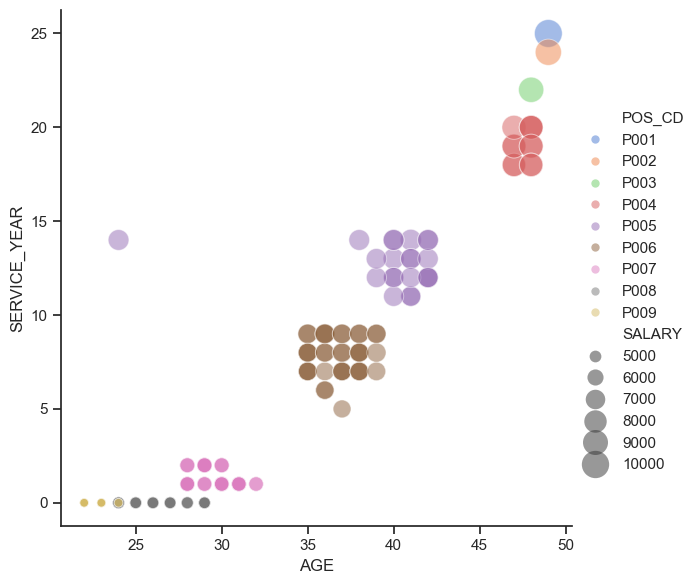

In [153]:
# sns.set_theme(rc={'figure.figsize': (4, 4)}, style='ticks')
sns.relplot(x="AGE", y="SERVICE_YEAR", hue="POS_CD", size="SALARY",
            sizes=(40, 400), alpha=.5, palette="muted",  # sizes:원의 크기 범위, alpha:투명도 설정
            height=6, data=hr_info)

## 3. 히트맵
- 상관계수 시각화

In [158]:
# 상관계수 구하기
hr_corr = hr_info[['SALARY','PERFORMANCE_SCORE','AGE','SERVICE_YEAR','TRAINING_HOURS']].corr()
hr_corr

,SALARY,PERFORMANCE_SCORE,AGE,SERVICE_YEAR,TRAINING_HOURS
SALARY,1.000000,0.609152,0.961699,0.970875,0.628931
PERFORMANCE_SCORE,0.609152,1.000000,0.582203,0.492801,0.551200
AGE,0.961699,0.582203,1.000000,0.932563,0.575867
SERVICE_YEAR,0.970875,0.492801,0.932563,1.000000,0.559911
TRAINING_HOURS,0.628931,0.551200,0.575867,0.559911,1.000000


<Axes: >

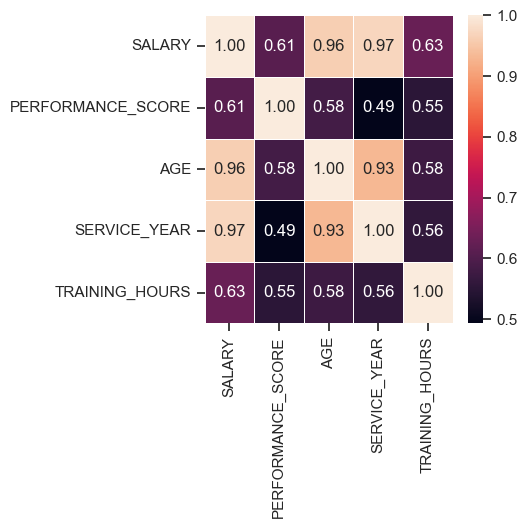

In [172]:
# 히트맵 그리기
sns.heatmap(hr_corr, annot=True, fmt=".2f", linewidths=.5) # 소숫점 두자릿수까지 float형